# (Ford GoBike System Data)
## by (Abdulhamead almania)

## Preliminary Wrangling

> Each trip is anonymized and includes:

##### The Data(Ford GoBike dataset) Come From (https://www.lyft.com/bikes/bay-wheels) And The Main Goal To Find The Relationship Between Labels To Improve The Profit, In This Project We Will Tray To Find Way To Attracting And Retaining New Clients

##### Database : 

###### The Dataset include a 2.5M rows and 10k unique pike for 11 month from 1 - 11, 330 days in 2019,The Dataset has a Like 350 unique station, The Dataset has 14 columns Shown below:


duration_sec

start_time

end_time

start_station_id

start_station_name

start_station_latitude

start_station_longitude

end_station_id

end_station_name

end_station_latitude

end_station_longitude

bike_id

user_type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

bike_share_for_all_trip



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
import seaborn as sns

### Gathering data
In our task, we have multiple database wee need to be joined together for full year’s coverage

### reading the data :

## code : 

In [2]:
df1 = pd.read_csv('201901-fordgobike-tripdata.csv', sep = ";")

## Test : 

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192082 entries, 0 to 192081
Data columns (total 14 columns):
duration_sec               192082 non-null int64
start_time                 192082 non-null object
end_time                   192082 non-null object
start_station_id           191834 non-null float64
start_station_name         191834 non-null object
start_station_latitude     192082 non-null float64
start_station_longitude    192082 non-null float64
end_station_id             191834 non-null float64
end_station_name           191834 non-null object
end_station_latitude       192082 non-null float64
end_station_longitude      192082 non-null float64
bike_id                    192082 non-null int64
user_type                  192082 non-null object
bike_share_for_all_trip    192082 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 20.5+ MB


### continuing reading the data :

## code : 

In [4]:
df2  = pd.read_csv('201902-fordgobike-tripdata.csv', sep = ";")
df3  = pd.read_csv('201903-fordgobike-tripdata.csv', sep = ";")
df4  = pd.read_csv('201904-fordgobike-tripdata.csv', sep = ";")
df5  = pd.read_csv('201905-baywheels-tripdata.csv', sep = ";")
df6  = pd.read_csv('201906-baywheels-tripdata.csv', sep = ";")
df7  = pd.read_csv('201907-baywheels-tripdata.csv', sep = ";")
df8  = pd.read_csv('201908-baywheels-tripdata.csv', sep = ";")
df9  = pd.read_csv('201909-baywheels-tripdata.csv', sep = ";")
df10 = pd.read_csv('201910-baywheels-tripdata.csv', sep = ";")
df11 = pd.read_csv('201911-baywheels-tripdata.csv', sep = ";")

C:\Users\BushMaster\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\BushMaster\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Test : 

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 14 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 19.6+ MB


In [6]:
df10.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,62337,2019-10-31 16:25:01.5970,2019-11-01 09:43:59.0290,148,Horton St at 40th St,37.829705,-122.287610,385,Woolsey St at Sacramento St,37.850578,-122.278175,12222,Customer,No
1,72610,2019-10-31 13:04:11.1950,2019-11-01 09:14:21.8050,376,Illinois St at 20th St,37.760458,-122.387540,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,282,Customer,No
2,56636,2019-10-31 17:17:37.6480,2019-11-01 09:01:33.7720,453,Brannan St at 4th St,37.777934,-122.396973,453,Brannan St at 4th St,37.777934,-122.396973,10940,Customer,No
3,42250,2019-10-31 20:11:11.1270,2019-11-01 07:55:21.7440,182,19th Street BART Station,37.809369,-122.267951,163,Lake Merritt BART Station,37.797320,-122.265320,12623,Subscriber,No
4,40076,2019-10-31 18:48:32.1410,2019-11-01 05:56:28.4670,237,Fruitvale BART Station,37.775232,-122.224498,237,Fruitvale BART Station,37.775232,-122.224498,2601,Customer,No


## here i start to merge the data.

## Code : 

In [7]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11])

C:\Users\BushMaster\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


## Test : 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356881 entries, 0 to 185495
Data columns (total 15 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
rental_access_method       object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(6), int64(2), object(7)
memory usage: 287.7+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000205F2896860>,
      dtype=object)

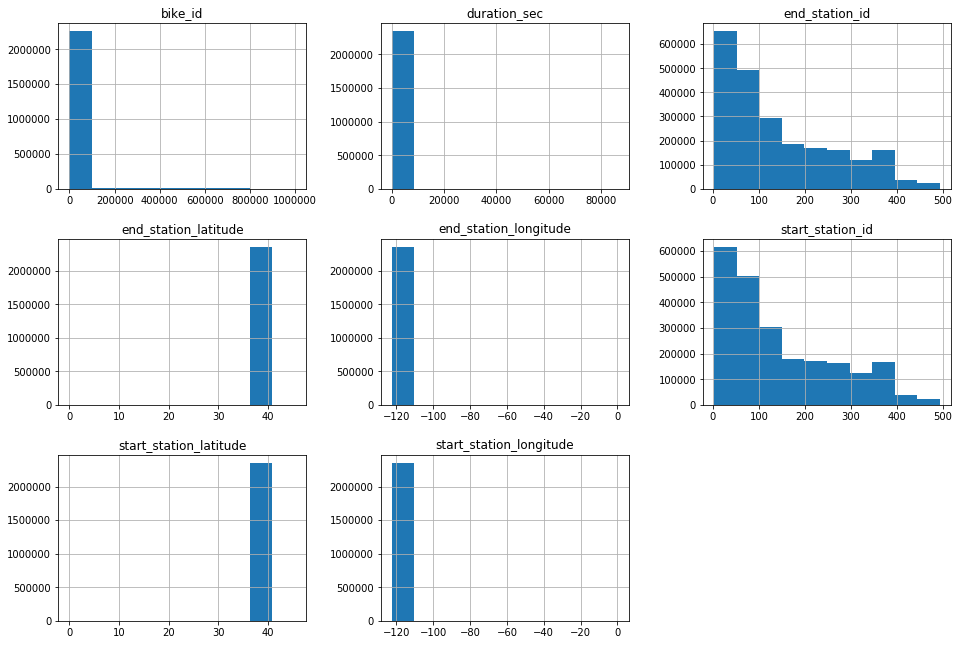

In [9]:
df.hist(figsize=(16,11))

In [10]:
df.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,4861,No,80825,196.0,37.808894,-122.256460,Grand Ave at Perkins St,2019-02-01 16:24:49.8640,NaN,229.0,37.775745,-122.213037,Foothill Blvd at 42nd Ave,2019-01-31 17:57:44.6130,Subscriber
1,5506,No,65900,134.0,37.752428,-122.420628,Valencia St at 24th St,2019-02-01 15:16:54.1730,NaN,4.0,37.785881,-122.408915,Cyril Magnin St at Ellis St,2019-01-31 20:58:33.8860,Subscriber
2,2717,No,62633,157.0,37.846784,-122.291376,65th St at Hollis St,2019-02-01 11:30:46.5300,NaN,245.0,37.870139,-122.268422,Downtown Berkeley BART,2019-01-31 18:06:52.9240,Customer
3,4557,No,44680,53.0,37.775946,-122.437777,Grove St at Divisadero,2019-02-01 08:10:50.3180,NaN,85.0,37.770083,-122.429156,Church St at Duboce Ave,2019-01-31 19:46:09.7190,Customer
4,2100,No,60709,28.0,37.787168,-122.388098,The Embarcadero at Bryant St,2019-02-01 07:10:51.0650,NaN,16.0,37.794130,-122.394430,Steuart St at Market St,2019-01-31 14:19:01.5410,Customer


In [11]:
df.shape[0]

2356881

In [12]:
df.describe()

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,start_station_id,start_station_latitude,start_station_longitude
count,2.356881e+06,2.356881e+06,2.295326e+06,2.356881e+06,2.356881e+06,2.297166e+06,2.356881e+06,2.356881e+06
mean,2.340328e+04,8.087309e+02,1.418893e+02,3.776645e+01,-1.223485e+02,1.453971e+02,3.776701e+01,-1.223515e+02
std,1.030756e+05,1.898050e+03,1.203936e+02,2.147563e-01,6.258700e-01,1.211839e+02,1.352916e-01,3.157512e-01
min,4.000000e+00,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225143e+02
25%,1.891000e+03,3.590000e+02,4.300000e+01,3.777008e+01,-1.224117e+02,4.700000e+01,3.776976e+01,-1.224130e+02
50%,3.799000e+03,5.710000e+02,1.010000e+02,3.778076e+01,-1.223981e+02,1.040000e+02,3.778053e+01,-1.223983e+02
75%,7.144000e+03,8.870000e+02,2.390000e+02,3.779639e+01,-1.222935e+02,2.410000e+02,3.779539e+01,-1.222934e+02
max,9.999370e+05,8.621700e+04,4.930000e+02,4.551000e+01,0.000000e+00,4.930000e+02,4.551000e+01,0.000000e+00


In [13]:
df.isnull().sum()

bike_id                          0
bike_share_for_all_trip      93157
duration_sec                     0
end_station_id               61555
end_station_latitude             0
end_station_longitude            0
end_station_name             61005
end_time                         0
rental_access_method       2263724
start_station_id             59715
start_station_latitude           0
start_station_longitude          0
start_station_name           59118
start_time                       0
user_type                        0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df.dtypes

bike_id                      int64
bike_share_for_all_trip     object
duration_sec                 int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name            object
end_time                    object
rental_access_method        object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name          object
start_time                  object
user_type                   object
dtype: object

## Make a Copy of Data

## Code : 

In [16]:
df_copy = df.copy()

## Drop Unwanted Columns 

## Code : 

In [17]:
df_copy.drop(['start_station_latitude','start_station_longitude','rental_access_method','end_station_latitude','end_station_longitude'], axis=1, inplace=True)

## Test : 

In [18]:
df_copy.dtypes

bike_id                      int64
bike_share_for_all_trip     object
duration_sec                 int64
end_station_id             float64
end_station_name            object
end_time                    object
start_station_id           float64
start_station_name          object
start_time                  object
user_type                   object
dtype: object

In [19]:
df_copy.bike_id.nunique()

10875

## Drop the null Value 
## Code :

In [20]:
df_clean = df_copy.dropna(axis = 0, how ='any') 

## Test : 

In [21]:
df_clean.isnull().sum()

bike_id                    0
bike_share_for_all_trip    0
duration_sec               0
end_station_id             0
end_station_name           0
end_time                   0
start_station_id           0
start_station_name         0
start_time                 0
user_type                  0
dtype: int64

In [22]:
df_clean.shape[0]

2262979

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002059FB289B0>,
      dtype=object)

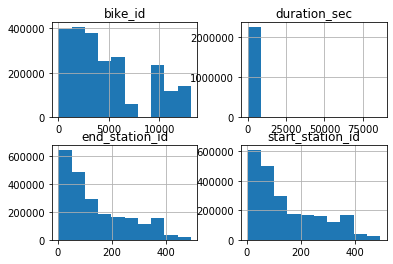

In [23]:
df_clean.hist()

## Create New Columns Based On Duration Columns From Sec To Min
## Code : 

In [24]:
df_clean['duration_min'] = df_clean['duration_sec'] / 60

C:\Users\BushMaster\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
df_clean.head(1)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_name,end_time,start_station_id,start_station_name,start_time,user_type,duration_min
0,4861,No,80825,196.0,Grand Ave at Perkins St,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,2019-01-31 17:57:44.6130,Subscriber,1347.083333


## Chane Data Type Of start_time and end_time To Timestamp
## Code : 

In [26]:
df_clean['start_time']=pd.to_datetime(df_clean['start_time'])
df_clean['end_time']=pd.to_datetime(df_clean['end_time'])

C:\Users\BushMaster\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\BushMaster\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2262979 entries, 0 to 184085
Data columns (total 11 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_name           object
end_time                   datetime64[ns]
start_station_id           float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  object
duration_min               float64
dtypes: datetime64[ns](2), float64(3), int64(2), object(4)
memory usage: 207.2+ MB


## Create New Columns Based On Data Columns To Week Day Names  For Start Time and End Time Traffic 
## Code : 

In [28]:
df_clean['start_time_weekday']=df_clean['start_time'].dt.weekday_name
df_clean['end_time_weekday']=df_clean['end_time'].dt.weekday_name


C:\Users\BushMaster\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\BushMaster\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Test : 

In [29]:
df_clean.head(1)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_name,end_time,start_station_id,start_station_name,start_time,user_type,duration_min,start_time_weekday,end_time_weekday
0,4861,No,80825,196.0,Grand Ave at Perkins St,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,2019-01-31 17:57:44.613,Subscriber,1347.083333,Thursday,Friday


In [30]:
df_clean['end_time_weekday'].value_counts()

Thursday     387942
Tuesday      382672
Wednesday    381536
Friday       359366
Monday       352366
Saturday     209838
Sunday       189259
Name: end_time_weekday, dtype: int64

## Create New Columns Based On Data Columns To Only Dates  For Start Time and End Time Traffic 
## Code : 

In [31]:
df_clean['start_time_date']=df_clean['start_time'].dt.date
df_clean['end_time_date']=df_clean['end_time'].dt.date

C:\Users\BushMaster\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\BushMaster\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Test :

In [32]:
df_clean.head(1)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_name,end_time,start_station_id,start_station_name,start_time,user_type,duration_min,start_time_weekday,end_time_weekday,start_time_date,end_time_date
0,4861,No,80825,196.0,Grand Ave at Perkins St,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,2019-01-31 17:57:44.613,Subscriber,1347.083333,Thursday,Friday,2019-01-31,2019-02-01


In [33]:
df_clean['start_time_date'].nunique()

334

## Create New Columns Based On Data Columns To Only Month  For Start Time and End Time Traffic 
## Code : 

In [34]:
df_clean['start_time_month']=df_clean['start_time'].dt.month.astype(int)
df_clean['end_time_month']=df_clean['end_time'].dt.month.astype(int)

C:\Users\BushMaster\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\BushMaster\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Test : 

In [35]:
df_clean['start_time_month'].value_counts()

3     256078
10    239895
4     239047
9     217986
8     210563
1     191834
6     187879
11    184086
2     183215
5     182148
7     170248
Name: start_time_month, dtype: int64

## Create New Columns Based On Data Columns To Only Hour  For Start Time and End Time Traffic 
## Code :

In [36]:
df_clean['start_time_hour']=df_clean['start_time'].dt.hour
df_clean['end_time_hour']=df_clean['end_time'].dt.hour

C:\Users\BushMaster\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\BushMaster\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Test : 

In [37]:
df_clean['start_time_hour'].value_counts()

17    272199
8     254081
18    214799
9     195725
16    173949
19    131116
7     128861
15    110900
12    101376
13     99343
10     98110
14     95944
11     91490
20     83057
21     58533
6      48423
22     39427
23     23275
0      12758
5      11968
1       7486
2       4803
4       2987
3       2369
Name: start_time_hour, dtype: int64

In [38]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2262979 entries, 0 to 184085
Data columns (total 19 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_name           object
end_time                   datetime64[ns]
start_station_id           float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  object
duration_min               float64
start_time_weekday         object
end_time_weekday           object
start_time_date            object
end_time_date              object
start_time_month           int32
end_time_month             int32
start_time_hour            int64
end_time_hour              int64
dtypes: datetime64[ns](2), float64(3), int32(2), int64(4), object(8)
memory usage: 328.0+ MB


In [39]:
print(df_clean.describe())

            bike_id  duration_sec  end_station_id  start_station_id  \
count  2.262979e+06  2.262979e+06    2.262979e+06      2.262979e+06   
mean   4.796712e+03  8.069304e+02    1.415932e+02      1.451120e+02   
std    3.692328e+03  1.922206e+03    1.202948e+02      1.210959e+02   
min    4.000000e+00  6.100000e+01    3.000000e+00      3.000000e+00   
25%    1.827000e+03  3.580000e+02    4.300000e+01      4.700000e+01   
50%    3.625000e+03  5.690000e+02    1.010000e+02      1.040000e+02   
75%    6.486000e+03  8.840000e+02    2.390000e+02      2.410000e+02   
max    1.311200e+04  8.621700e+04    4.930000e+02      4.930000e+02   

       duration_min  start_time_month  end_time_month  start_time_hour  \
count  2.262979e+06      2.262979e+06    2.262979e+06     2.262979e+06   
mean   1.344884e+01      6.002137e+00    6.002211e+00     1.354237e+01   
std    3.203676e+01      3.159159e+00    3.159161e+00     4.799467e+00   
min    1.016667e+00      1.000000e+00    1.000000e+00     0.0000

### What is the structure of your dataset?

The current data set of 11'csv' files, representing each month of the year(2019),there are 2,262,979 rows in this dataset and 20 features.


### What is/are the main feature(s) of interest in your dataset?

duration min, bike share for all trip, station names, user type, and Dates 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

bike id and bike share for all trip, end station name, start station name, user type, duration min, start time weekday, start time date, start time month, start time_hour


## Univariate Exploration

> In this section we investigate distributions of individual variables 


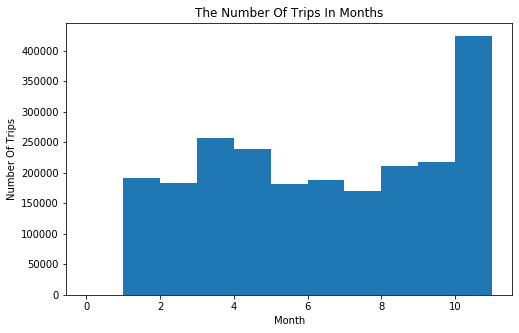

In [40]:
binsize = 1
bins = np.arange(0, df_clean['start_time_month'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'start_time_month', bins = bins)
plt.xlabel('Month')
plt.title("The Number Of Trips In Months")
plt.ylabel('Number Of Trips')
plt.show()

##### Here We Can See In Last Month Has Increasing On Trips It's Almost A Double Last Month, Maybe Tha Company It Spread Among People, Either By Advertising Or In Some Other Way.

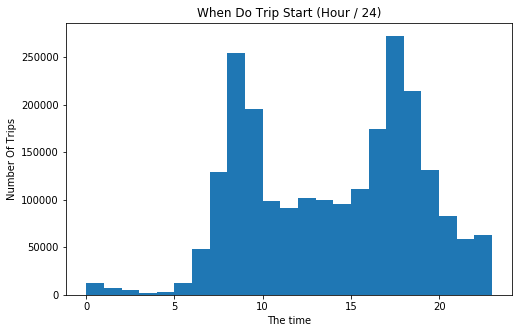

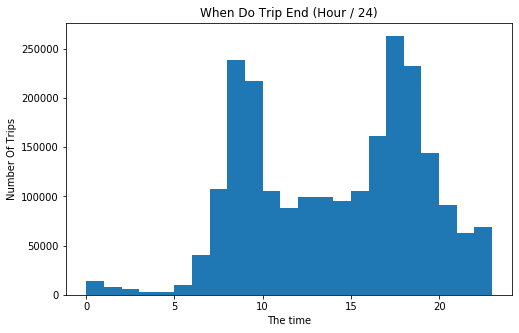

In [41]:
binsize = 1
bins = np.arange(0, df_clean['start_time_hour'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'start_time_hour', bins = bins)
plt.xlabel('The time')
plt.title("When Do Trip Start (Hour / 24)")
plt.ylabel('Number Of Trips')
plt.show()
#######
bins = np.arange(0, df_clean['end_time_hour'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'end_time_hour', bins = bins)
plt.xlabel('The time')
plt.title("When Do Trip End (Hour / 24)")
plt.ylabel('Number Of Trips')
plt.show()

###### Here We Can See The Rush Hours Has Most Trip From 7-10 and 15-20,It May Be Because It Is Time To Work In These Areas,Of Course, We Only Notice A Very Slight Difference Between The Start And End Times Of The Trip.

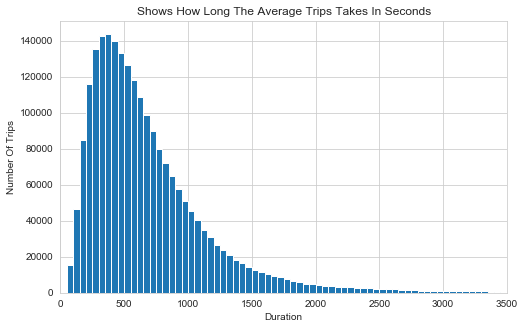

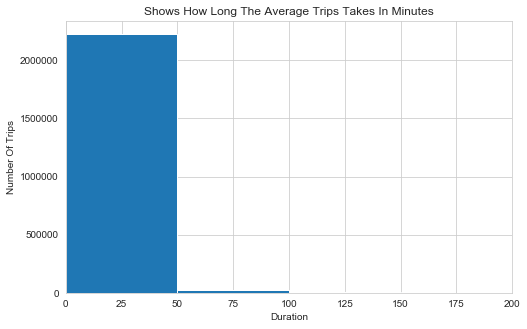

In [64]:
binsize = 1
bins = np.arange(0, df_clean['duration_sec'].max()+50, 50)
plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'duration_sec', bins = bins)
plt.xlim(0,3500) # to set a limt 
plt.xlabel('Duration')
plt.title("Shows How Long The Average Trips Takes In Seconds")
plt.ylabel('Number Of Trips')
plt.show()
#######
bins = np.arange(0, df_clean['duration_min'].max()+50, 50)
plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'duration_min', bins = bins)
plt.xlim(0,200) # to set a limt 
plt.xlabel('Duration')
plt.title("Shows How Long The Average Trips Takes In Minutes")
plt.ylabel('Number Of Trips')
plt.show()

###### We See The Difference Between Trips In Terms Of Time Taken, So We Find That Most Trips Are Between One To Twenty-Five Minutes, The Reason May Be That Most Of The Users Live Near To The Intended Area, And The Company Also Takes More Money If The Service Uses More Than Forty Five Minutes Also, Note That There Are Few People Who Travel Long Distances / Use Them Longer

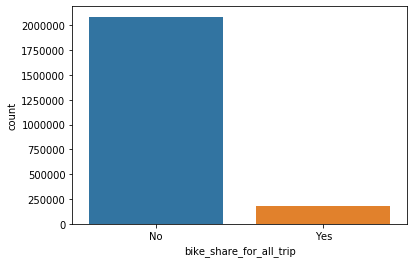

In [43]:
sb.countplot(data=df_clean,x='bike_share_for_all_trip')

###### The (Bike Share For All Trip) Is A Offer All Residents Of The Bay Area An Affordable, Accessible, And Fun new Transportation Option. Bike Share For All Provides A One-Time $ 5 Annual Membership For Qualifying Residents, But a Few Customers In This Subscription ,Why ? Fate Is Due To The Nature Of This Service Or It Is A New Service

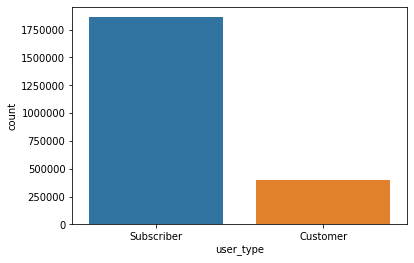

In [44]:
sb.countplot(data=df_clean,x='user_type')

###### We Can See Is a Few Is A New Customer And Not Subscribed, The Company Must Find A Solution To Make Them Subscribers Or Permanent Customers Through Offers Or Discounts For New Customers.

In [45]:
plt.rcParams['figure.figsize'] = (14, 6)


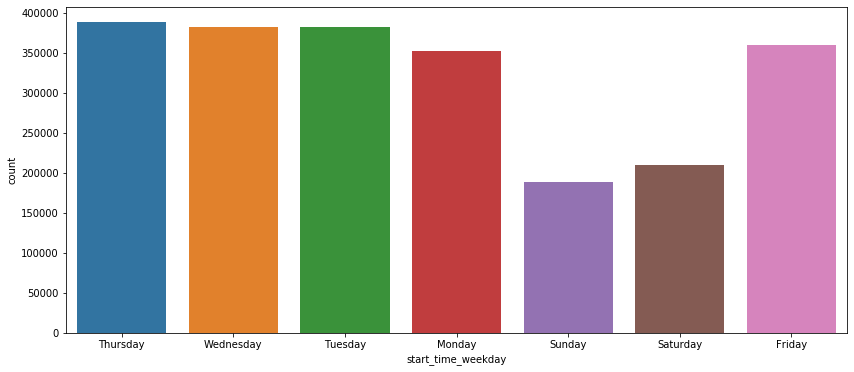

In [46]:
sb.countplot(data=df_clean,x='start_time_weekday')

###### We Can See In Weekend(Sunday and Saturday) The Trip is Going Down, There May Be A Solution To Increasing The Number Of Trips, Such As Placing A Special Weekend Discount Or A Special Offer To Get People Excited.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I'm Supposed To Convert Some Variable Like Day, Month, and Time, But I Already Got That One Step Earlier

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Bike Share For All Trip Is A Special Offer But Its Has A Few People They Are Subscripts

## Bivariate Exploration

>In this section,  we investigate relationships between pairs of variables in our data. 

C:\Users\BushMaster\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\BushMaster\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\BushMaster\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


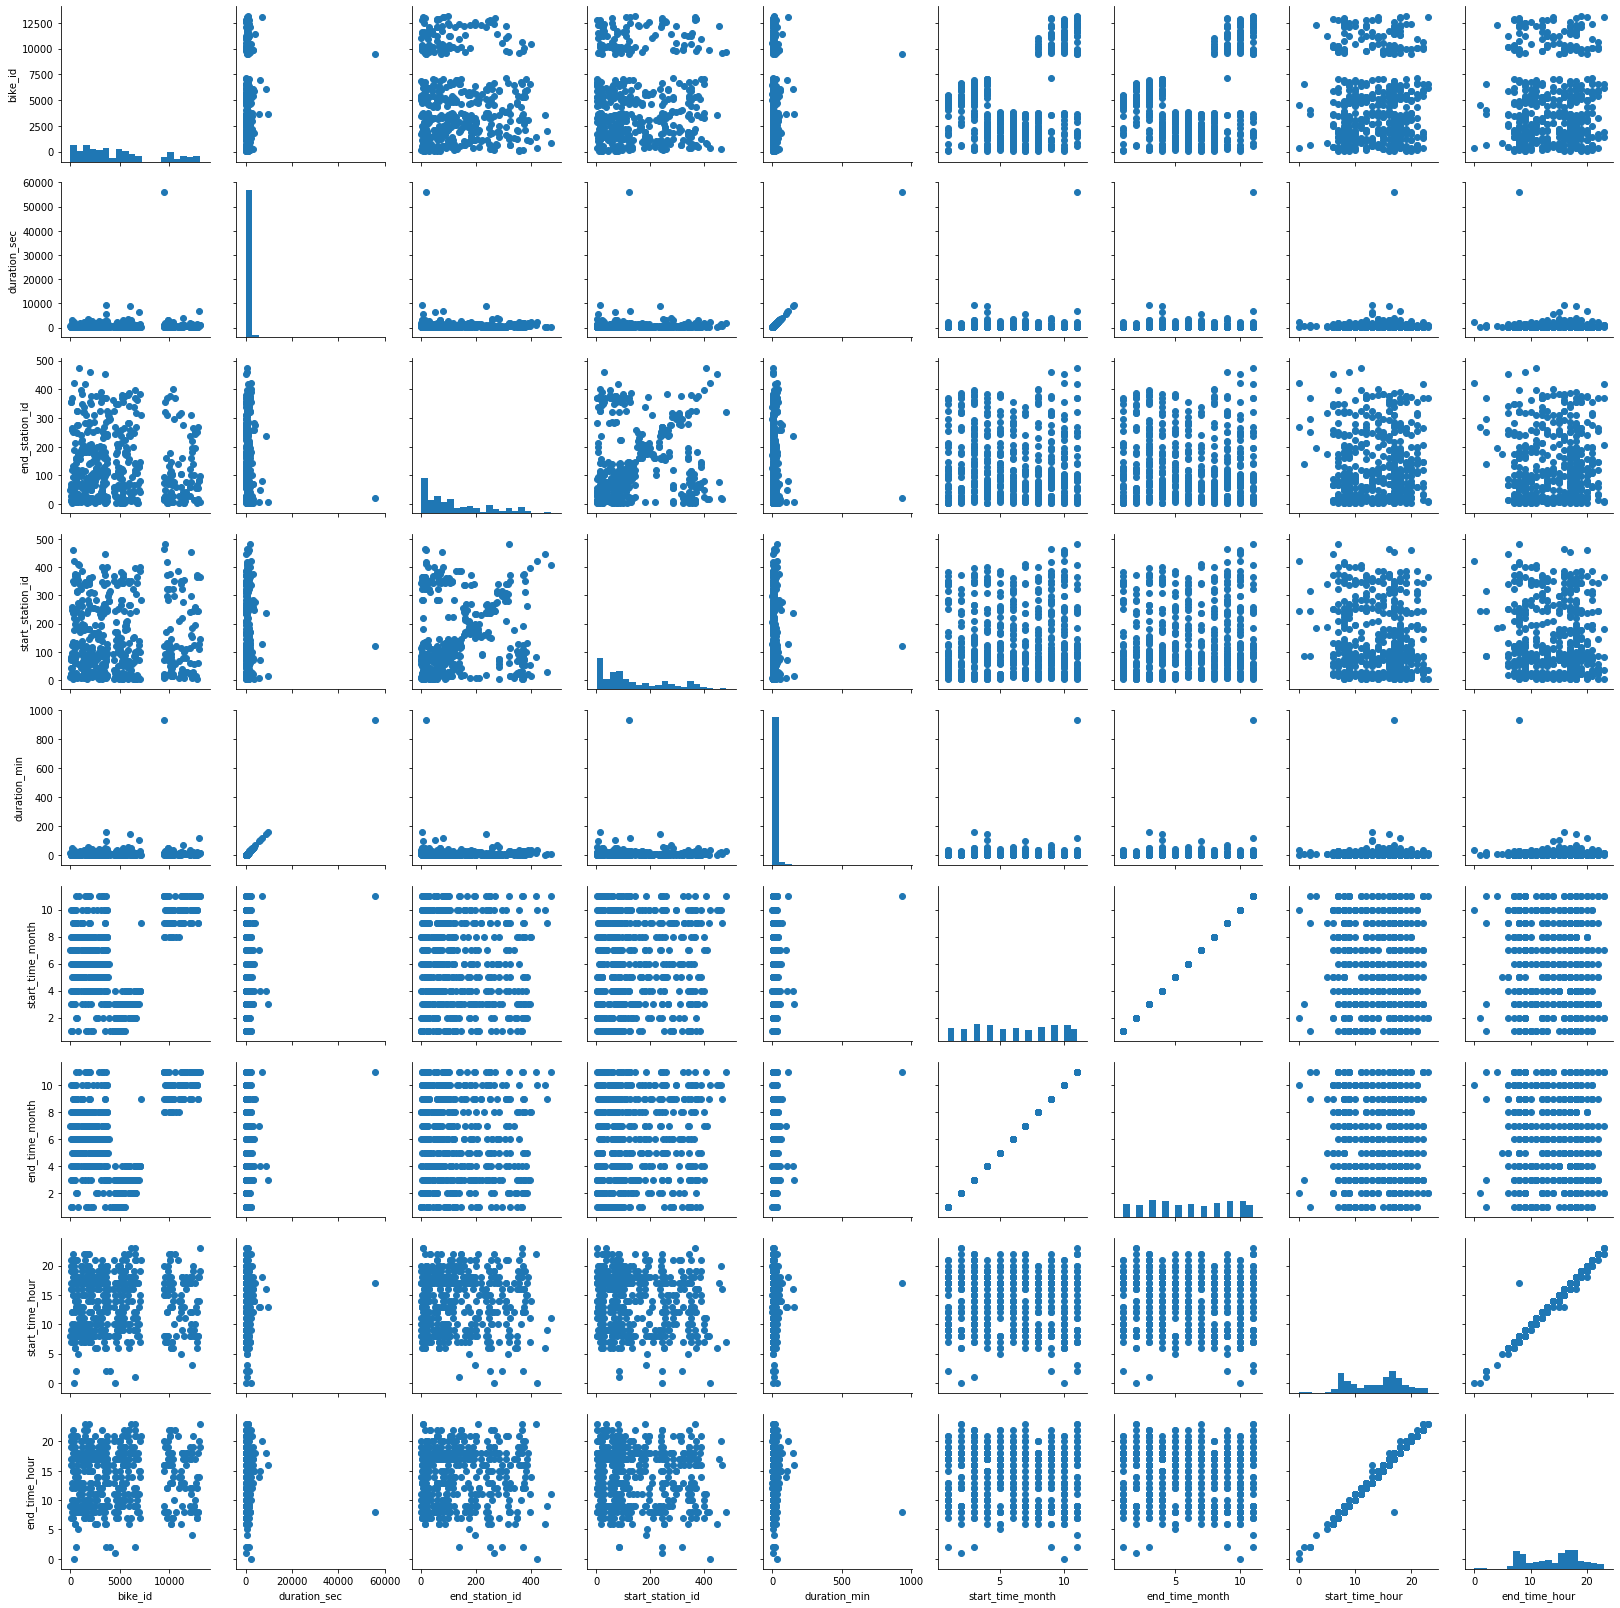

In [47]:
samples = np.random.choice(df_clean.shape[0], 500, replace = False)
df_clean_samp = df_clean.loc[samples,:]

g = sb.PairGrid(data = df_clean_samp)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

###### Best Way To Start To Find The Relationship Is Use A Scatter Plot

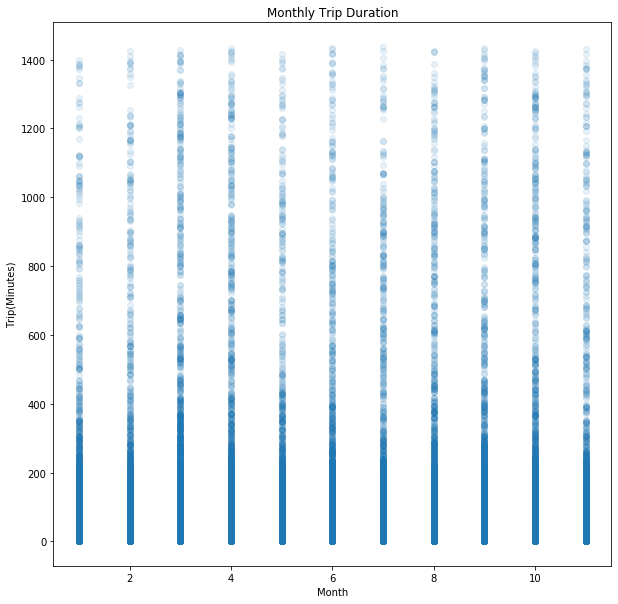

In [48]:
plt.figure(figsize = [10,10])
plt.scatter(data = df_clean , x = 'start_time_month' , y = 'duration_min' , alpha = 0.1 )
plt.title('Monthly Trip Duration')
plt.xlabel('Month')
plt.ylabel('Trip(Minutes)');

###### We Can See The Who Take Longer Duration Of Each Month And They Almost The Same

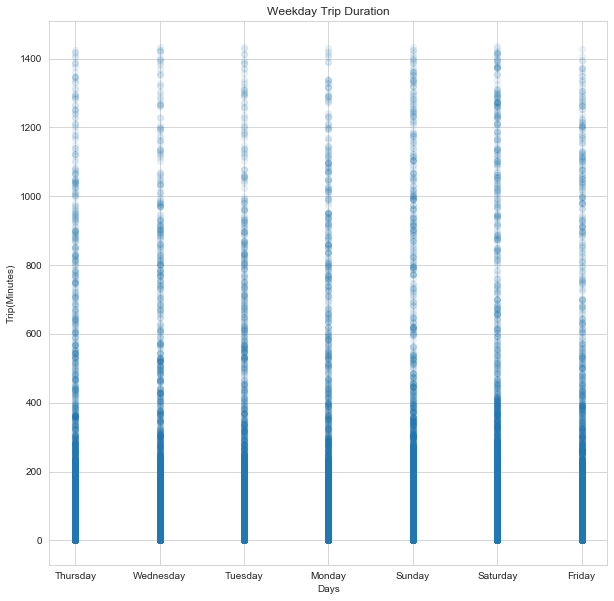

In [76]:
plt.figure(figsize = [10,10])
plt.scatter(data = df_clean , x = 'start_time_weekday' , y = 'duration_min' , alpha = 0.08 )
plt.title('Weekday Trip Duration')
plt.xlabel('Days')
plt.ylabel('Trip(Minutes)');

###### We Can See The Who Take Longer Duration Of Each Week Days And They Almost The Same

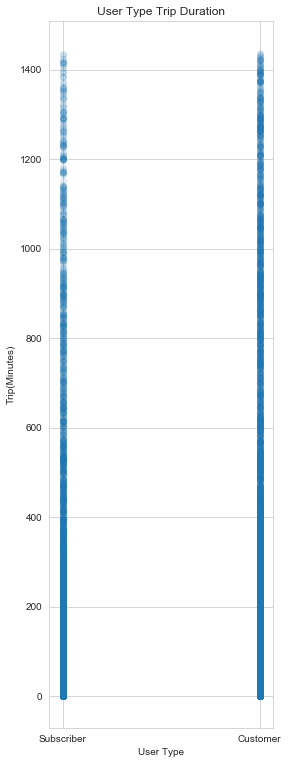

In [79]:
plt.figure(figsize = [4,13])
plt.scatter(data = df_clean , x = 'user_type' , y = 'duration_min' , alpha = 0.1 )
plt.title('User Type Trip Duration')
plt.xlabel('User Type')
plt.ylabel('Trip(Minutes)');

###### We Can See The Customer They Take Duration More Than Subscriber

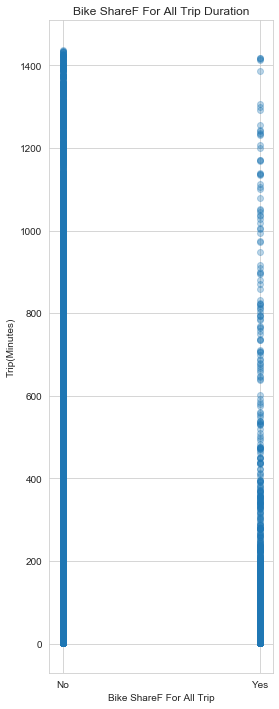

In [78]:
plt.figure(figsize = [4,12])
plt.scatter(data = df_clean , x = 'bike_share_for_all_trip' , y = 'duration_min' , alpha = 0.3 )
plt.title('Bike Share For All Trip Duration')
plt.xlabel('Bike ShareF For All Trip')
plt.ylabel('Trip(Minutes)');

###### We Can See The Trips Who Take The Special Offer They Take Less Than Duration 

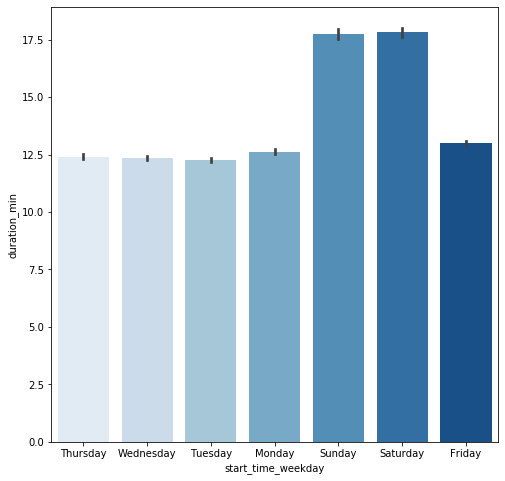

In [52]:
plt.figure(figsize = [8, 8])
sb.barplot(data = df_clean, x = 'start_time_weekday', y = 'duration_min', palette = 'Blues')
plt.show()

###### We Can See In Sunday And Saturday They had The Most Late To Start (But In Previous Graphic is Has A The Lowest Number Of Trips)

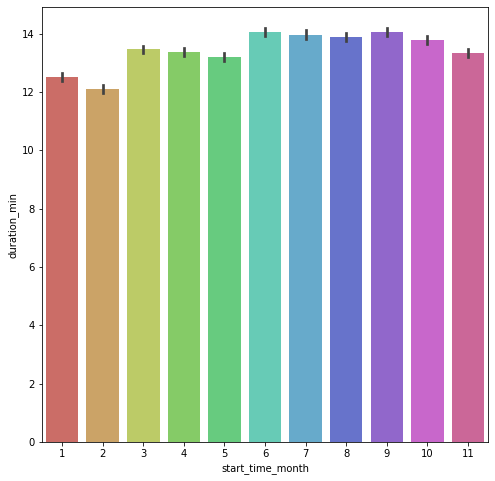

In [53]:
plt.figure(figsize = [8, 8])
sb.barplot(data = df_clean, x = 'start_time_month', y = 'duration_min', palette = 'hls')
plt.show()

###### Almost Every Month Has The Same Duration Of Time

Text(0, 0.5, 'Trip')

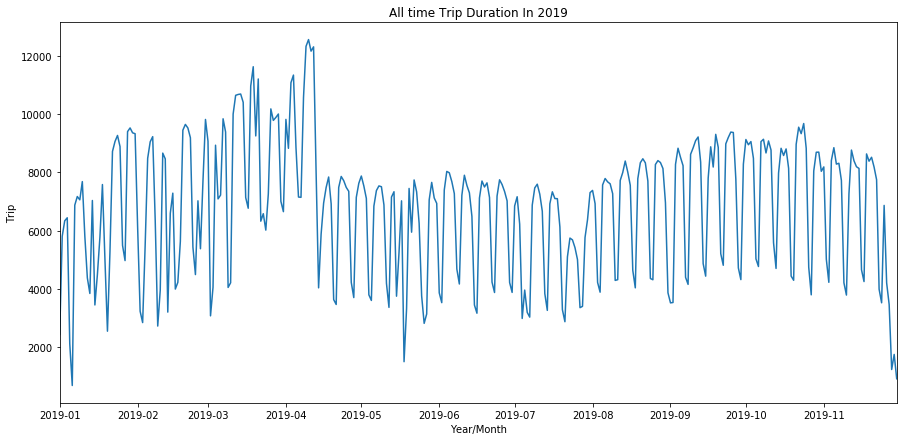

In [54]:
df_clean.groupby('start_time_date').agg({'bike_id':'count'}).plot(legend=False, figsize=(15,7))
plt.title('All time Trip Duration In 2019')
plt.xlabel('Year/Month')
plt.ylabel('Trip')

###### We Can See After 2019-4 It Has Huge Decreased For Number Of Trips

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There Is A Difference In Terms Of The Number Of Trips On Weekdays Such As Weekends And Times When People Start Using Bikes

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Duration and  Dates  

## Multivariate Exploration

> we create plots of three or more variables to investigate in our data even further. 

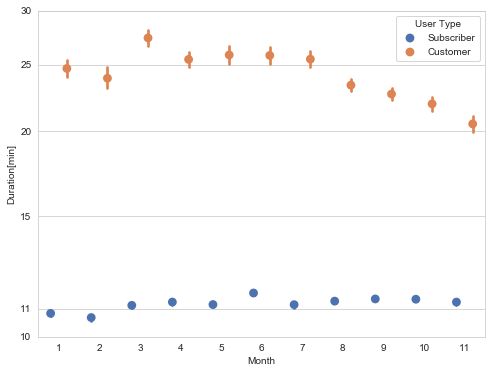

In [83]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_clean, x = 'start_time_month', y = 'duration_min', hue = 'user_type',
           palette = 'deep', linestyles = '', dodge = 0.4)
plt.title('')
plt.ylabel('Duration[min]')
plt.xlabel('Month')
plt.yscale('log')
plt.legend(title='User Type')
plt.yticks([10, 11,15,20,25,30],['10', '11','15','20','25','30'])
ax.set_yticklabels([],minor = True)
plt.show();

###### We Can See The Customer They Take Duration More Than Subscriber

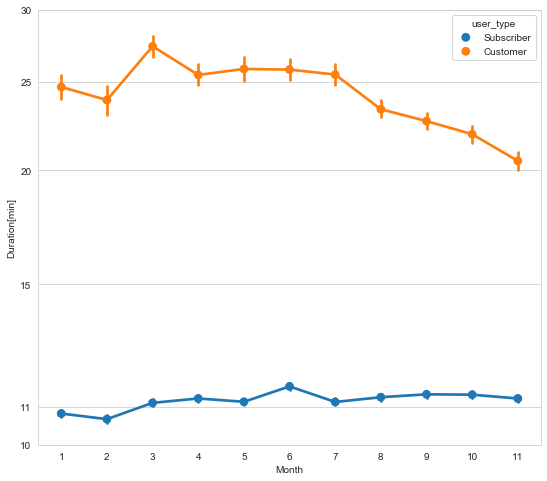

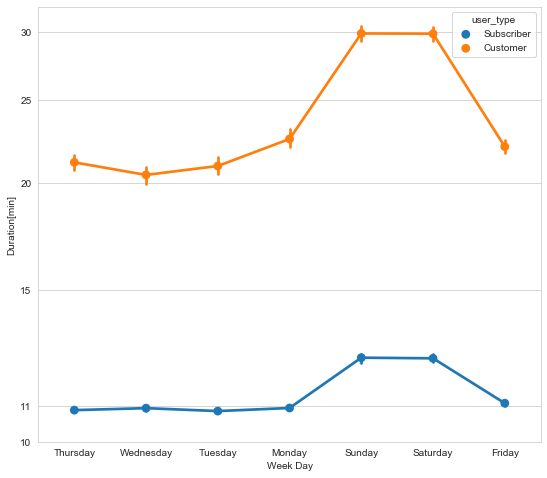

In [86]:
plt.figure(figsize = [9,8])

ax = sb.pointplot(data = df_clean, x = 'start_time_month', y = 'duration_min', hue = 'user_type')

plt.yscale('log')
plt.ylabel('Duration[min]')
plt.xlabel('Month')
ax.set_yticklabels([], minor = True)
plt.yticks([10, 11,15,20,25,30],['10', '11','15','20','25','30'])
plt.show();
###
plt.figure(figsize = [9,8])
ax = sb.pointplot(data = df_clean, x = 'start_time_weekday', y = 'duration_min', hue = 'user_type')
plt.yscale('log')
plt.ylabel('Duration[min]')
plt.xlabel('Week Day')
ax.set_yticklabels([], minor = True)
plt.yticks([10, 11,15,20,25,30],['10', '11','15','20','25','30'])

plt.show();

###### We Can See The Customer They Take Duration More Than Subscriber, We Can See In Sunday And Saturday They had The Longest Time For The Trip.

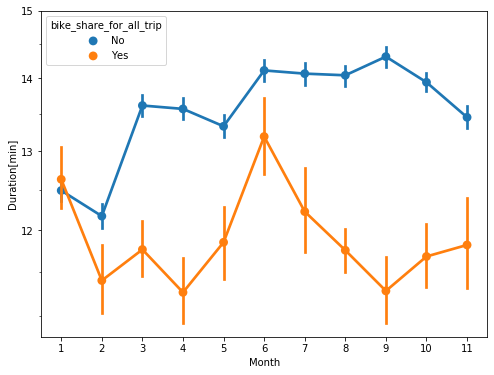

In [57]:
plt.figure(figsize = [8,6])

ax = sb.pointplot(data = df_clean, x = 'start_time_month', y = 'duration_min', hue = 'bike_share_for_all_trip')

# special handling of tick marks following seaborn function - you might try
# doing a log transform on the data itself instead of this workaround.
plt.yscale('log')
plt.ylabel('Duration[min]')
plt.xlabel('Month')

ax.set_yticklabels([], minor = True)
plt.yticks([12,13,14, 15],['12','13','14','15'])

plt.show();

###### We Can See The Trips Who Take The Special Offer They Take Less Than Duration  Each Month 

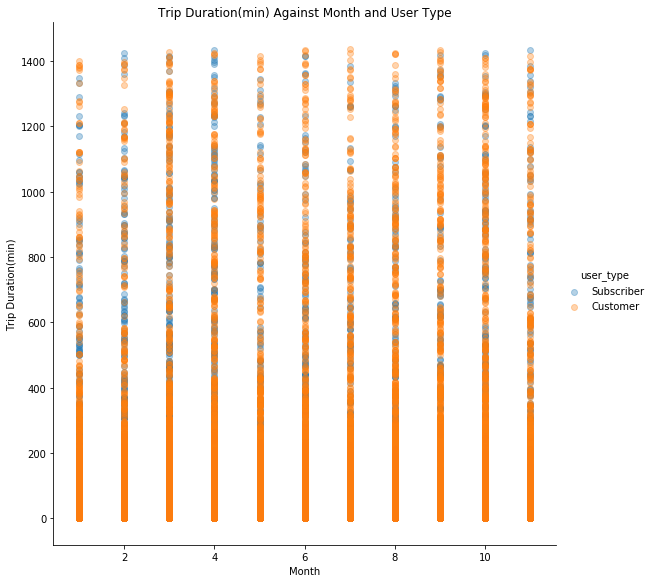

In [58]:
g = sb.FacetGrid(data =  df_clean, hue = 'user_type', height = 8)
g.map(plt.scatter, 'start_time_month','duration_min', alpha = 1/3)
g.add_legend()
plt.title('Trip Duration(min) Against Month and User Type')
plt.xlabel('Month')
plt.ylabel('Trip Duration(min)');

###### We Can See The Customer They Take Duration More Than Subscriber, And It Almost The Same Each Month

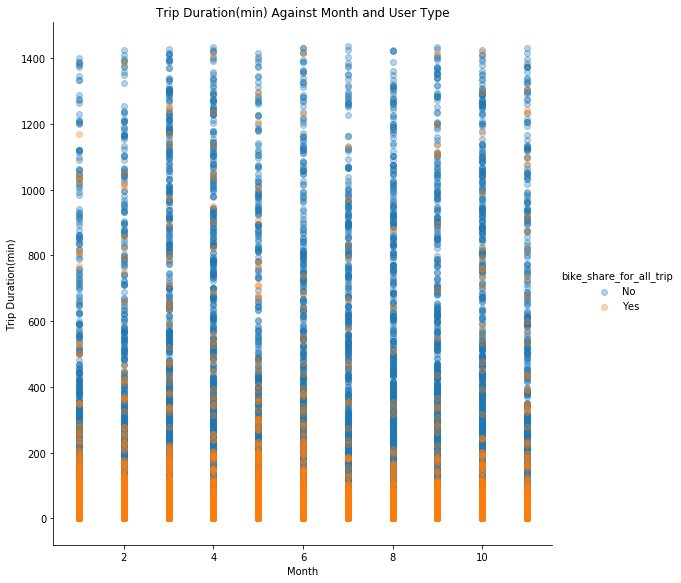

In [59]:
g = sb.FacetGrid(data =  df_clean, hue = 'bike_share_for_all_trip', height = 8)
g.map(plt.scatter, 'start_time_month','duration_min', alpha = 1/3)
g.add_legend()
plt.title('Trip Duration(min) Against Month and User Type')
plt.xlabel('Month')
plt.ylabel('Trip Duration(min)');

###### We Can See The Trips Who Take The Special Offer They Take Less Than Duration  Each Month 

[None]

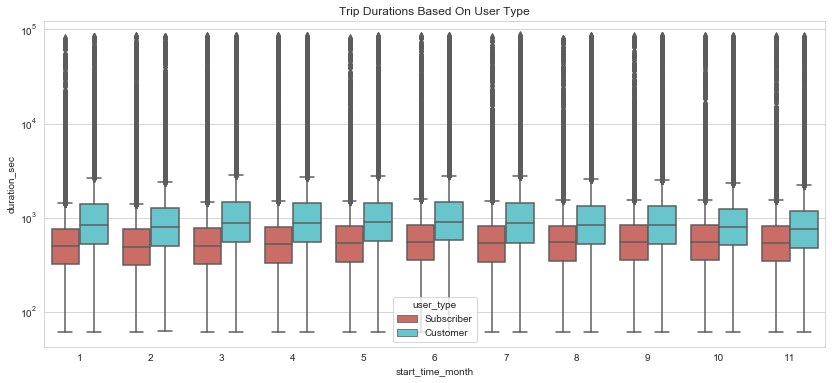

In [73]:
sns.set_style('whitegrid')
ax = sns.boxplot(x='start_time_month', y='duration_sec', palette='hls', hue='user_type', data=df_clean)
ax.set_title('Trip Durations Based On User Type')
ax.set(yscale='log')

###### The Dataset It Has A Lot Of Out Lire

[None]

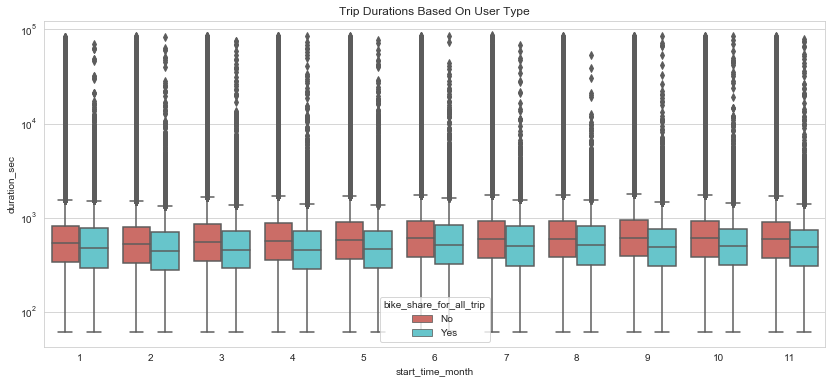

In [75]:
sns.set_style('whitegrid')
ax = sns.boxplot(x='start_time_month', y='duration_sec', palette='hls', hue='bike_share_for_all_trip', data=df_clean)
ax.set_title('Trip Durations Based On User Type')
ax.set(yscale='log')

###### The Dataset It Has A Lot Of Out Lire

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> There Is A Difference In Terms Of The Number Of Trips On Weekdays Such As Weekends And Times When People Start Using Bikes Or The special Offer

### Were there any interesting or surprising interactions between features?

> Duration and  Dates  

# Conclusion :